## Customer Spending Score

In this project we will use customer data to calculate their relative spending score. The inputs we will use are: 
<br>
- Gender
- Age
- Annual income


We will perform a <b>linear regression</b> to calculate the spending score from this data. In the second part we will use <b>Tkinter</b> library to create a simple app that, loaded the model, will help us to calculate the spending score for new customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("D:/Hands-On-Machine-Learning-For-Algorithmic-Trading/Kaggle_Datasets/customer segmentation/Mall_Customers.csv")

df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score' ]

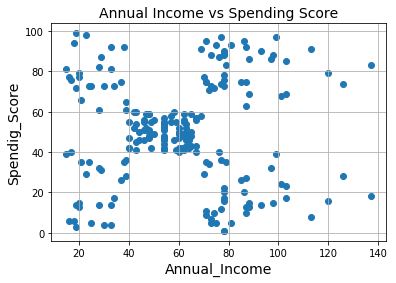

In [2]:
plt.scatter(df['Annual_Income'], df['Spending_Score'])
plt.title('Annual Income vs Spending Score', fontsize=14)
plt.xlabel('Annual_Income', fontsize=14)
plt.ylabel('Spendig_Score', fontsize=14)
plt.grid(True)
plt.show()

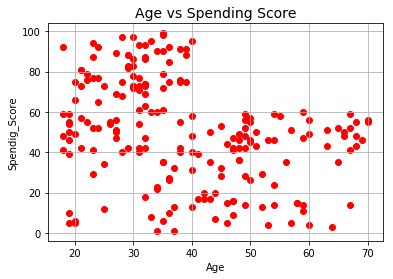

In [3]:
plt.scatter(df['Age'], df['Spending_Score'], color='red')
plt.title('Age vs Spending Score', fontsize=14)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Spendig_Score', fontsize=10)
plt.grid(True)
plt.show()

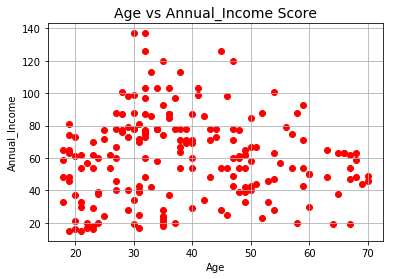

In [4]:
plt.scatter(df['Age'], df['Annual_Income'], color='red')
plt.title('Age vs Annual_Income Score', fontsize=14)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Annual_Income', fontsize=10)
plt.grid(True)
plt.show()

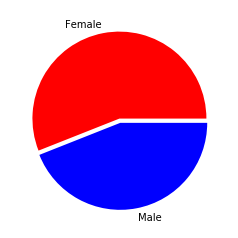

In [5]:
clients_for_gender = df['Gender'].value_counts()
label = ['Female','Male']

plt.pie(clients_for_gender, labels=label, explode=(0.0, 0.05), colors = ['red', 'blue'])
plt.show()

In [6]:
df['Gender'] = np.where(df['Gender'] == "Female", 0, 1)

df.drop(["CustomerID"], axis=1, inplace=True)

X = df.iloc[:, 0:3].values

y = df.iloc[:, 3].values

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 73.93003357772213
Coefficients: 
 [-2.01323375 -0.60037104  0.0079294 ]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

age_mean = df['Age'].mean()
age_std = df['Age'].std()

income_mean = df['Annual_Income'].mean()
income_std = df['Annual_Income'].std()

In [9]:
def normalize(df):
    
    cols_to_norm = ['Age','Annual_Income',]
    df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
    
    X = df.iloc[:, 0:3].values

    y = df.iloc[:, 3].values

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 1)
    
    return(X_train, X_test, y_train, y_test)
    
X_train, X_test, y_train, y_test = normalize(df)

regr.fit(X_train, y_train)

print(regr.intercept_)
print(regr.coef_)

51.330214831498694
[-2.50885443 -8.32215193  1.26222881]


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
y_pred = regr.predict(X_test)    

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_pred, y_test))
print(rms)

22.96642369568834


In [13]:
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

label1 = tk.Label(root, text='Gender:')
canvas1.create_window(140, 100, window=label1)

entry1 = tk.Entry (root) 
canvas1.create_window(270, 100, window=entry1)

label2 = tk.Label(root, text='Age:')
canvas1.create_window(140, 120, window=label2)

entry2 = tk.Entry (root) 
canvas1.create_window(270, 120, window=entry2)

label3 = tk.Label(root, text='Annual Income(in k):')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry (root) 
canvas1.create_window(270, 140, window=entry3)

def values(): 
    global Gender 
    Gender = str(entry1.get()) 
    
    if Gender == "Male" or "male":
        Gender = 1
    if Gender == "Female" or "female":
        Gender = 0 
        
    
    global Age 
    Age = int(entry2.get())
    Age = (Age - age_mean)/age_std
    
    global Income
    Income = int(entry3.get())
    Income = (Income - income_mean)/income_std
    
    Prediction_Spending_Score  = ('Predicted Spendin Score:(+-22) ', regr.predict([[Gender , Age, Income]]))
    label_Prediction = tk.Label(root, text= Prediction_Spending_Score, bg='orange')
    canvas1.create_window(270, 200, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Spending score',command=values, bg='orange')
canvas1.create_window(270, 170, window=button1)


root.mainloop()

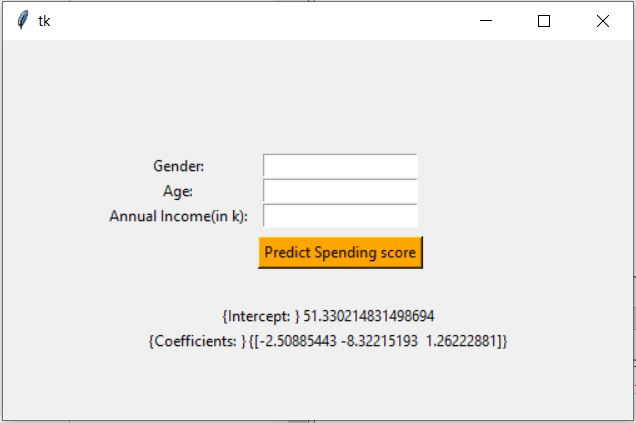

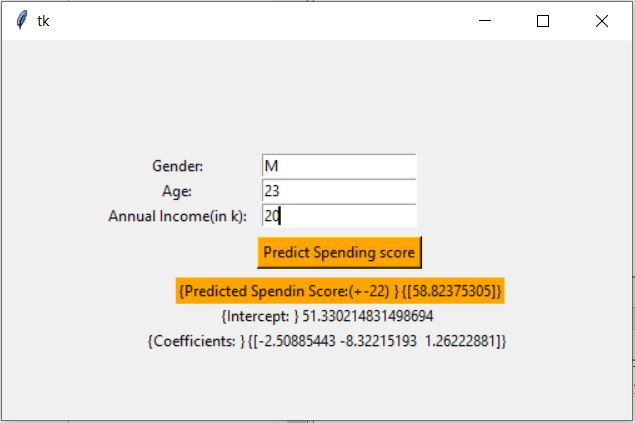